## Homework 4
**Due by Friday, August 4th at 3pm**
<br>
**Name: Nick Kern **
<br>
**Date:   **

### Points: Assignment Total 40 points
**Problem 1: 15 points**

**Problem 2: 10 points**

**Problem 3: 15 points**

### Problem 1: Diffraction Limit of a Telescope

Newman, Exercise 5.4

When imaging objects in space with telescopes and cameras, our ability to resolve the size of an object is limited by the fundamental physics of diffraction, which says that when light passes through the aperture (opening) of a telescope it interacts with itself and distorts the pristine light from the astronomical source. Therefore, a source that looks like a point in space (e.g., a star) does not actually look like a point in our images, but actually looks like an [Airy disk](https://en.wikipedia.org/wiki/Airy_disk)

<img src='airy.jpg' width=200px/>
<center>Example of an Airy Disk diffraction pattern produced by a circular telescope aperture.</center>

The intensity of the light in this diffraction pattern is given by

\begin{align}
I(r) = \left(\frac{J_{1}(kr)}{kr}\right)^{2},
\end{align}

where $r$ is the distance from the center of the image, $k = 2\pi/\lambda$ (where $\lambda$ is the wavelength of the light we are observing), and $J_1(x)$ is a Bessel function. The family of Bessel functions $J_m(x)$ are given by

\begin{align}
J_{m}(x) = \frac{1}{\pi}\int_{0}^{\pi}\cos(m\theta - x\sin\theta)\ d\theta
\end{align}

where $m$ is a non-negative integer and $x\ge0$.

1.
Write a Python function `J(m, x)` that calculates the value of $J_{m}(x)$ using **Simpson's Rule** to within an estimated error tolerance of $\le 10^{-5}$. Use your function to make a plot of the Bessel functions $J_0, J_1, \&\ J_2$ from $0 < x < 20$ on the same plot. Use a legend to specify which curve belongs to which function.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def J(m, x, N=200):
    # define integrand
    def integrand(theta, m, x):
        return np.cos(m*theta - x*np.sin(theta))
    
    # Enter while loop for error tolerance
    while True:
        # get width
        h = np.pi/float(N)

        # generate theta-values
        theta = np.linspace(0, np.pi, N+1)

        # get y-values
        y = integrand(theta, m, x)

        # take half of them for error estimatef
        y1 = y[::2].copy()
        h1 = np.pi/float(N/2)

        # add multiplicative factors
        y[1:-1:2] *= 4
        y[2:-2:2] *= 2
        y1[1:-1:2] *= 4
        y1[2:-2:2] *= 2

        # Compute sum
        I = (h/3.)*np.nansum(y)
        I1 = (h1/3.)*np.nansum(y1)
        
        # Estimate error 
        err = np.abs(I-I1)/15.0

        # exit while loop
        if err < 1e-5:
            break
        else:
            N *= 2
    return I / np.pi

In [19]:
# generate x-values
N_x = 500
x = np.linspace(0.1,20,N_x)
J0 = np.empty(N_x)
J1 = np.empty(N_x)
J2 = np.empty(N_x)
for i in range(len(x)):
    J0[i] = J(0, x[i])
    J1[i] = J(1, x[i])
    J2[i] = J(2, x[i])

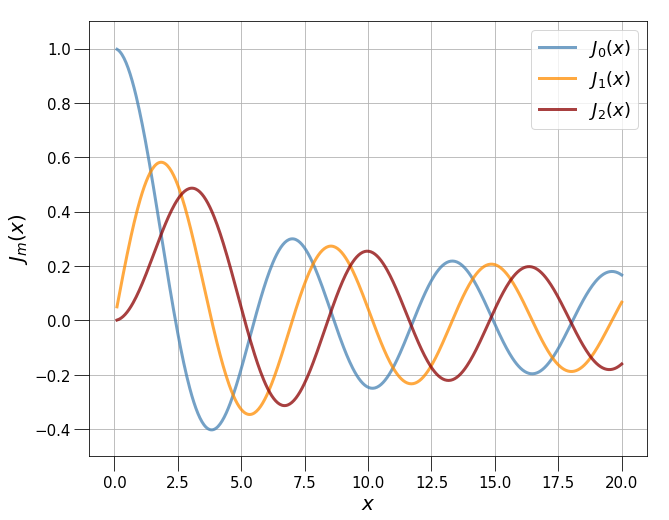

In [20]:
# figure!
fig = plt.figure(figsize=(10,8))

# axes
ax = fig.add_subplot(1,1,1)
ax.grid(True)
ax.tick_params(labelsize=15, size=15)
ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$J_m(x)$', fontsize=20)
ax.set_xlim(-1,21)
ax.set_ylim(-0.5, 1.1)

# plot
p0, = ax.plot(x, J0, color='steelblue', linewidth=3, alpha=0.75)
p1, = ax.plot(x, J1, color='darkorange', linewidth=3, alpha=0.75)
p2, = ax.plot(x, J2, color='darkred', linewidth=3, alpha=0.75)

# legend
ax.legend([p0, p1, p2], ['$J_0(x)$','$J_1(x)$','$J_2(x)$'],fontsize=18)

2.
Use your function to make a 2D density plot of $I(r)$ assuming $\lambda = 500$ nanometers (similar to example image above). Set the width of density plot to be around 2 micrometers.

Hint: You may find it useful that $\lim_{x\rightarrow0}\ J_{1}(x)/x = \tfrac{1}{2}$.

Hint: You can use the `vmax` keyword argument of `imshow` to saturate the high pixel values such that the rings of the diffraction pattern are more visible. Try using a `vmax` of around 0.01 to get the rings to be visible.

In [21]:
# Define I
k = 2 * np.pi / 500e-9
def I(r):
    return ( J(1, k*r) / (k*r) )**2

In [22]:
# make the meshgrid
N_pixel = 100
X, Y = np.meshgrid(np.linspace(-1e-6, 1e-6, N_pixel), np.linspace(-1e-6, 1e-6, N_pixel))
R = np.sqrt(X**2 + Y**2)

In [23]:
# iterate through meshgrid with double for loop
I_r = np.empty( (N_pixel, N_pixel) )
for i in range(N_pixel):
    for j in range(N_pixel):
        I_r[i,j] = I(R[i,j])

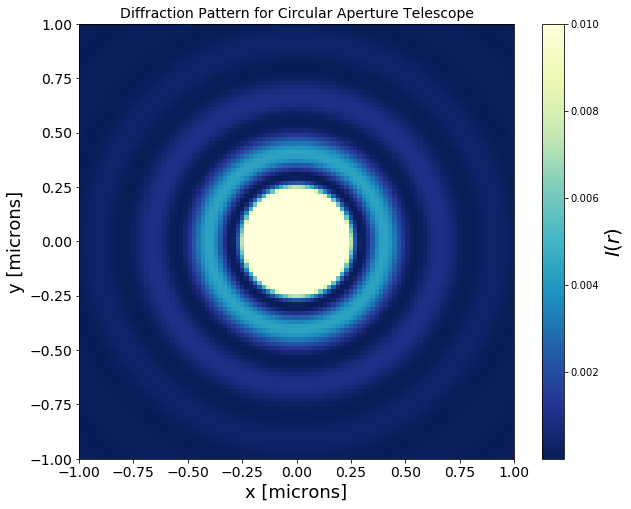

In [51]:
# figure
fig = plt.figure(figsize=(10, 8))

# axes
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(labelsize=14)
ax.set_xlabel('x [microns]', fontsize=18)
ax.set_ylabel('y [microns]', fontsize=18)
ax.set_title('Diffraction Pattern for Circular Aperture Telescope', fontsize=14)

# plot
cax = ax.imshow(I_r, vmax=0.01, cmap='YlGnBu_r', extent=(-1, 1, -1, 1))
cbar = fig.colorbar(cax)
cbar.set_label('$I(r)$', fontsize=20)

### Problem 2: The Lorenz Attractor

Newman, Exercise 8.3

The [Lorenz equations](https://en.wikipedia.org/wiki/Lorenz_system) are a set of ordinary differential equations first developed to model convection in the Earth's atmosphere. These equations have the interesting property of **deterministic chaos**, meaning the solution is highly sensitive to the initial conditions, and exhibit apparent randomness even though there is nothing random about the solution to an ODE. When solved, these equations give rise to the famous Lorenz attractor.

<img src='lorenz.gif' width=300px/>
<center>Example of the Lorenz attractor.</center>

The Lorenz equations are written as

\begin{align}
\frac{dx}{dt} = \sigma(y - x);\ \ \frac{dy}{dt}=rx-y-xz;\ \ \frac{dz}{dt} = xy-bz
\end{align}

1.
Write a program to solve the Lorenz equations using RK4 with constants $\sigma = 10,\ r=28,\ b=\tfrac{8}{3}$. Solve for a time range of $0 < t < 50$ with initial conditions of $(x,y,z) = (0,1,0)$.

2.
Make a plot of the solution of $y(t)$ (i.e., $y$ on y-axis and $t$ on x-axis). The unpredictability of the motion should be apparent.

3.
Make a plot of $z(x)$ (i.e., $z$ on the y-axis and $x$ on the x-axis). Do you see the signature butterfly-shaped image that is the iconic Lorenz attractor similar to what is shown above?

In [57]:
def f(r, t):
    x = r[0]
    y = r[1]
    z = r[2]
    fx = sigma*(y-x)
    fy = R*x - y - x*z
    fz = x*y - b*z
    return np.array([fx, fy, fz], dtype=np.float)

def RK4(f, r1, t1, t2, N=100):
    # Define bounds and step-sizes
    dt = float(t2 - t1) / N
    
    # Make t-points
    tpoints = np.linspace(t1, t2, N+1)

    # Define initial condition
    r = r1.copy()

    # Iterate RK4 Method
    xpoints = []
    ypoints = []
    zpoints = []
    for t in tpoints:
        # append value of x to xpoints
        xpoints.append(r[0])
        ypoints.append(r[1])
        zpoints.append(r[2])

        # update value using RK4
        k1 = dt * f(r, t)
        k2 = dt * f(r+0.5*k1, t+0.5*dt)
        k3 = dt * f(r+0.5*k2, t+0.5*dt)
        k4 = dt * f(r+k3, t+dt)

        r += (k1 + 2*k2 + 2*k3 + k4)/6.0

    xpoints = np.array(xpoints)
    ypoints = np.array(ypoints)
    zpoints = np.array(zpoints)
    
    return tpoints, xpoints, ypoints, zpoints

In [78]:
# give initial conditions and solve!
sigma = 10.0
R = 28.0
b = 8./3
r1 = np.array([0.0, 1.0, 0.0])

tpoints, xpoints, ypoints, zpoints = RK4(f, r1, 0, 50, N=10000)

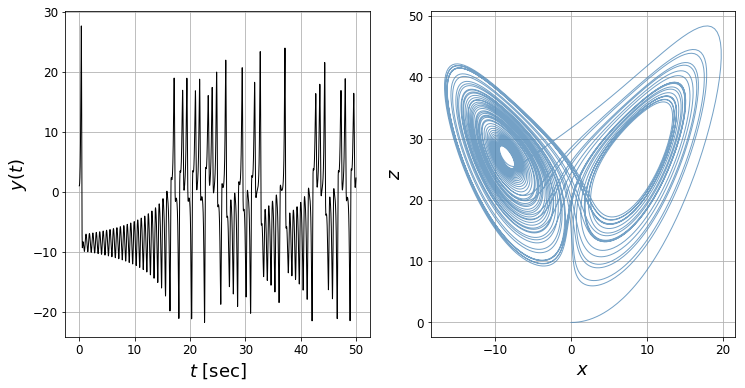

In [93]:
# figure
fig = plt.figure(figsize=(12, 6))

# ax1
ax1 = fig.add_subplot(1, 2, 1)
ax1.grid(True)
ax1.tick_params(labelsize=12)
ax1.plot(tpoints, ypoints, color='k', linewidth=1)
ax1.set_xlabel(r'$t$ [sec]', fontsize=18)
ax1.set_ylabel(r'$y(t)$', fontsize=18)

# ax2
ax2 = fig.add_subplot(1, 2, 2)
ax2.grid(True)
ax2.tick_params(labelsize=12)
ax2.plot(xpoints, zpoints, color='steelblue', linewidth=1, alpha=0.75)
ax2.set_xlabel(r'$x$', fontsize=18)
ax2.set_ylabel(r'$z$', fontsize=18)`

We can see the unpredictibility in the first plot on the left, in that there is not coherent period to the oscillations. On the right we see the signature "butterfly" image of the Lorenz attractor. 

### Problem 3: Cometary Orbits

Newman, Exercise 8.10

In the early 1600s, [Johannes Kepler](https://en.wikipedia.org/wiki/Johannes_Kepler) observed that two-body gravitational systems produce orbits that are elliptical in shape and came up with a set of [empirical laws](https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion) describing their nature. It wasn't until almost 100 years later that Isaac Newton showed from the principles of his [theory of gravitation](https://en.wikipedia.org/wiki/Newton%27s_law_of_universal_gravitation) that elliptical orbits are exactly what we would expect for two-body systems in the Solar system.

Let's consider the orbit of a comet around the Sun. While planetary orbits are near circular, comets travel in highly elliptical orbits. Spending most of their time in the outskirts of the Solar system, they periodically plunge towards the Sun, whip around, and are flung back out into the Solar periphery.

The second-order differential equation describing the gravitational force on a comet is given to us by Newton's second law:

\begin{align}
m\frac{d^{2}\boldsymbol{r}}{dt^{2}} = -\left(\frac{GMm}{r^{2}}\right)\frac{\boldsymbol{r}}{r}
\end{align}

If we assume the orbit falls in the $x-y$ plane of a coordinate system, we can show that we are left with two second-order differential equations

\begin{align}
\frac{d^{2}x}{dt^{2}} = -GM\frac{x}{r^{3}};\ \ \frac{d^{2}y}{dt^{2}} = -GM\frac{y}{r^{3}}
\end{align}

where recall $r = \sqrt{x^{2}+y^{2}}$.

1.
Using the methods we have discussed, turn these two second-order DE into four first-order DE. You don't have to provide an explicit answer to this question, because the solution will be apparent in your code.

2.
Write a program to solve these equations with RK4 with a *fixed step size* that allows you to accurately calculate the trajectory for 2 full orbits. By "accurate" we mean that after 2 full orbits, the comet ends nearly on-top of where it started. How many steps did it take to complete this calculation to the desired accuracy?

For initial conditions take positions of $x = 4\times10^{9}$ km and $y=0$ km, and initial velocities of $v_{x} = 0$ and $v_{y} = 500$ meters / second.

3.
Copy your program to a new cell and repeat the calculation but this time modify your program to use an *adaptive step size*. Set an accuracy threshold of $\delta = 1$ kilometer per year in the position of the comet. Plot the trajectory over two full orbits and use both a marker and a line to show the trajectory and the RK4 time steps.

What do you see in terms of the distribution of step-sizes over the duration of the orbit? Why do you think it looks like this? How does the speed and number of steps used in this program compare to your program from (2)?

___
---

We can unpack two second-order DE into four first-order DE as follows:

\begin{align}
\frac{dx}{dt} &= v_x\\
\frac{dv_x}{dt} &= -GM\frac{x}{r^3}\\
\frac{dy}{dt} &= v_y\\
\frac{dv_y}{dt} &= -GM\frac{y}{r^3}\\
\end{align}

In [393]:
# derivative function
def f(r, t):
    # unpack f, which contains four variables
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    r_mag = np.sqrt(x**2 + y**2)
    
    # assign derivatives
    fx = vx
    fvx = -G * M * x / r_mag**3
    fy = vy
    fvy = -G * M * y / r_mag**3
    
    # repack
    return np.array([fx, fvx, fy, fvy], dtype=np.float)

In [394]:
# RK4 algorithm
def RK4(f, r1, t1, t2, N=1000):
    # Define bounds and step-sizes
    dt = float(t2 - t1) / N
    
    # Make t-points
    tpoints = np.linspace(t1, t2, N+1)

    # Define initial condition
    r = r1.copy()

    # Iterate RK4 Method
    xpoints = []
    ypoints = []
    for t in tpoints:
        # append value of x to xpoints
        xpoints.append(r[0])
        ypoints.append(r[2])

        # update value using RK4
        k1 = dt * f(r, t)
        k2 = dt * f(r+0.5*k1, t+0.5*dt)
        k3 = dt * f(r+0.5*k2, t+0.5*dt)
        k4 = dt * f(r+k3, t+dt)

        r += (k1 + 2*k2 + 2*k3 + k4)/6.0

    xpoints = np.array(xpoints)
    ypoints = np.array(ypoints)
    
    return tpoints, xpoints, ypoints

In [395]:
# initial conditions
r1 = np.array([4e12, 0, 0, 500])
G = 6.67e-11
M = 1.9e30   # kg

# run integrator for 4e9 seconds or 126 years
tpoints, xpoints, ypoints = RK4(f, r1, 0, 4e9, N=100000)

(-1000000000000.0, 1000000000000.0)

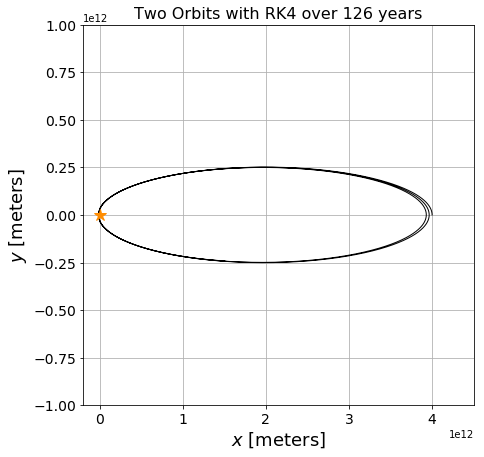

In [396]:
# plot
fig = plt.figure(figsize=(7,7))

# axes
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(labelsize=14)
ax.grid(True)
ax.set_xlabel(r'$x$ [meters]', fontsize=18)
ax.set_ylabel(r'$y$ [meters]', fontsize=18)
ax.set_title('Two Orbits with RK4 over 126 years', fontsize=16)

ax.plot(xpoints[::10], ypoints[::10], color='k', linewidth=1)
ax.plot(0, 0, marker='*', color='darkorange', markersize=12)
ax.set_xlim(-2e11, 4.5e12)
ax.set_ylim(-1e12,1e12)

We have scaled our axes such that they are nearly the same, which means the shape of the orbit is roughly representative of the ellipticity. We can see that our comet has gone 2+ orbits and comes back almost to the same spot where it started, but is having its orbital energy sapped away due to numerical approximation error. This is using an integration time of $4\times10^{9}$ seconds, which is roughly 127 years, using $N = 10^5$ steps.

In [397]:
# RK4 algorithm
def RK4_adaptive(f, r1, t1, t2, dt=1e4, err_tol=3e-5):
    # Define initial condition
    r = r1.copy()
    t = t1
    
    # define a function for RK4 update
    def rk4_update(r, t, dt):
        # update value using RK4
        k1 = dt * f(r, t)
        k2 = dt * f(r+0.5*k1, t+0.5*dt)
        k3 = dt * f(r+0.5*k2, t+0.5*dt)
        k4 = dt * f(r+k3, t+dt)
        return r + (k1 + 2*k2 + 2*k3 + k4)/6.0
    
    # Iterate RK4 Method
    xpoints = []
    ypoints = []
    tpoints = []
    while t < t2:
        # append value of x to xpoints
        xpoints.append(r[0])
        ypoints.append(r[2])
        tpoints.append(t)

        # evaluate error
        while True:
            # two small steps
            r1_a = rk4_update(r, t, dt)
            r1 = rk4_update(r1_a, t+dt, dt)
            # one big step
            r2 = rk4_update(r, t, 2*dt)
            
            # calculate x and y errors
            eps_x = np.abs(r1[0] - r2[0])/30.0
            eps_y = np.abs(r1[2] - r2[2])/30.0
            eps_tot = np.sqrt(eps_x**2 + eps_y**2)
            
            # calculate rho
            rho = (dt*err_tol/eps_tot)**(1./4)

            # evaluate ideal step size
            if rho >= 1.0:
                if rho >= 2.0:
                    rho = 2.0
                break
            else:
                if rho < 0.5:
                    rho = 0.5
                dt *= 0.99*rho

        # update dt
        dt *= 0.99*rho
        
        # update r to the single step
        r = r1_a.copy()
        
        # update t
        t += dt
        
    xpoints = np.array(xpoints)
    ypoints = np.array(ypoints)
    tpoints = np.array(tpoints)
    
    return tpoints, xpoints, ypoints

In [408]:
# initial conditions
r1 = np.array([4e12, 0, 0, 500])
G = 6.67e-11
M = 1.9e30   # kg

# run integrator for 4e9 seconds or 126 years
tpoints, xpoints, ypoints = RK4_adaptive(f, r1, 0, 4e9, dt=1e4, err_tol=1e-5)

/Users/nkern/Software/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


(-1000000000000.0, 1000000000000.0)

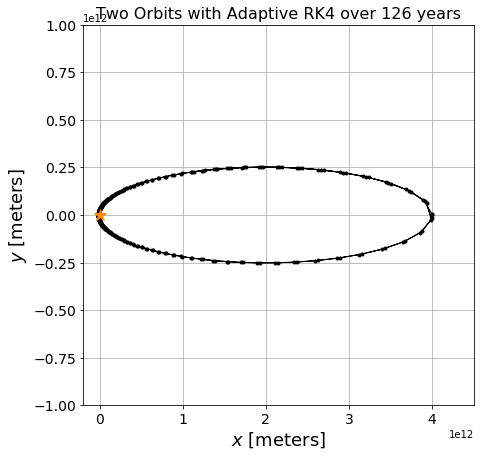

In [410]:
# plot
fig = plt.figure(figsize=(7,7))

# axes
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(labelsize=14)
ax.grid(True)
ax.set_xlabel(r'$x$ [meters]', fontsize=18)
ax.set_ylabel(r'$y$ [meters]', fontsize=18)
ax.set_title('Two Orbits with Adaptive RK4 over 126 years', fontsize=16)

ax.plot(xpoints[::10], ypoints[::10], color='k', marker='.', linewidth=1)
ax.plot(0, 0, marker='*', color='darkorange', markersize=12)
ax.set_xlim(-2e11, 4.5e12)
ax.set_ylim(-1e12,1e12)

With the adaptive time step and an error tolerance of 1 km / year (~$10^{-5}$ m / sec), the code runs orders of magnitude faster, only needs ~3000 time steps, and is more accurate than a fixed time-step RK4 in terms of the orbit retaining its kinetic energy. 

If we plot each RK4 time step as a point, we find that the points are clustered near perihelion (i.e., when the comet is closest to the Sun) because that's when the comet experience the highest acceleration, and we therefore need a higher time resolution. Out at aphelion (i.e., furthest away from the Sun) the acceleration is so weak we don't need that many time steps.